# Tarea 6: Regresión logística

## Regresión logística y regularización
Considera los siguientes datos de entrenamiento donde queremos predecir la categoria $y$ en función de $x$ usando regresión logística, es decir, la probabilidad de que la $y$ sea igual a $1$ es igual a:

$$p(x) = h(a + bx)$$

Donde $a$ y $b$ son parámetros que queremos ajustar y $h$ es la función sigmoide que vimos en clase.

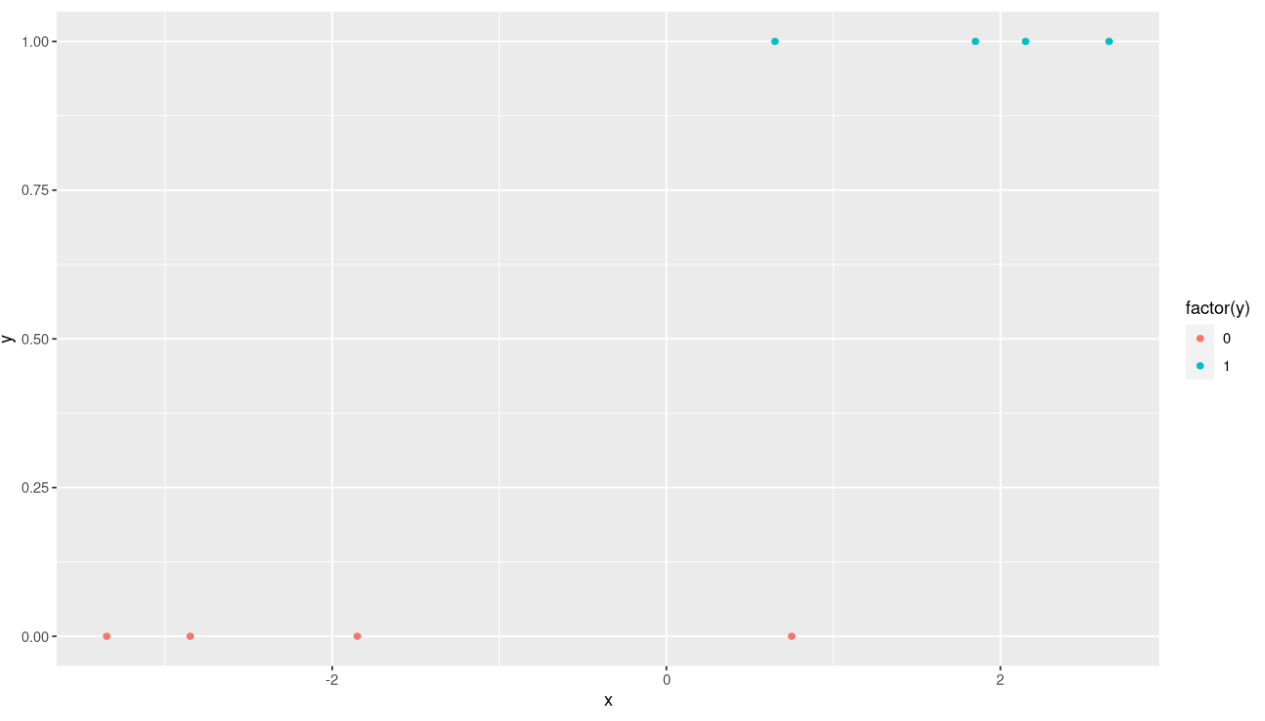

Se usarán funciones auxiliares, se pueden proponer coeficientes $a$ y $b$ de regresión logística y ver cómo ajusta el modelo.
<br>Utilizando $(a,b)=(0,-0.2)$, se obtiene el modelo:

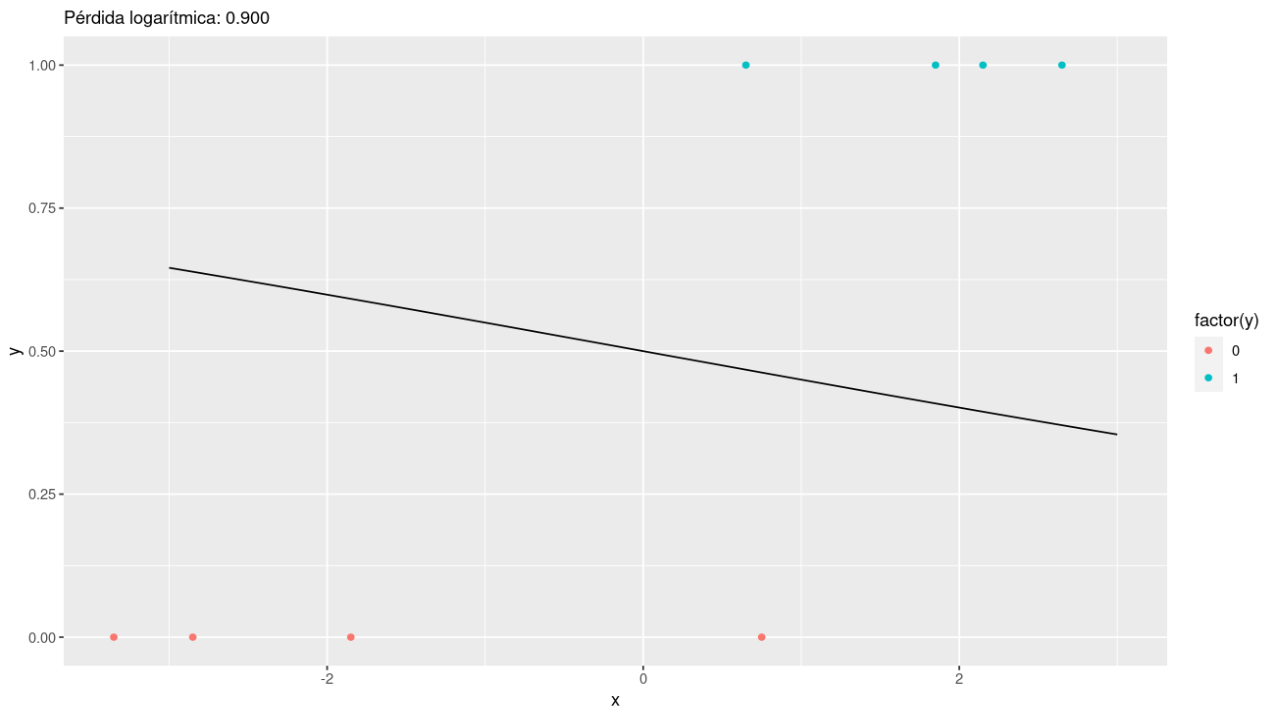

**Pregunta 1**: Cambiando los valores de $a$ y $b$ busca minimizar la pérdida logarítmica aproximadamente. ¿Tu solución da probabilidades muy cercanas a 0 y 1 para todos los valores de $x$?

> Sugerencia: 
> 1) Cambia uno de los parámetros por una cantidad **no muy grande**. Checa si la pérdida sube o baja.
> 2) Si baja, entonces regresa a 1 con el otro parámetro.
> 3) Si no baja, mueve el parámetro en dirección contraria, hasta que la pérdida baje
> 4) Repite 1 alternando parámetros.

<br>Utilizando $(a,b)=(0,-0.2)$ se obtiene un modelo que resulta en probabilidades cercanas a los valores $0$ y $1$ em $(x<-2) \cup (x>2)$, y se ve de la siguiente forma:

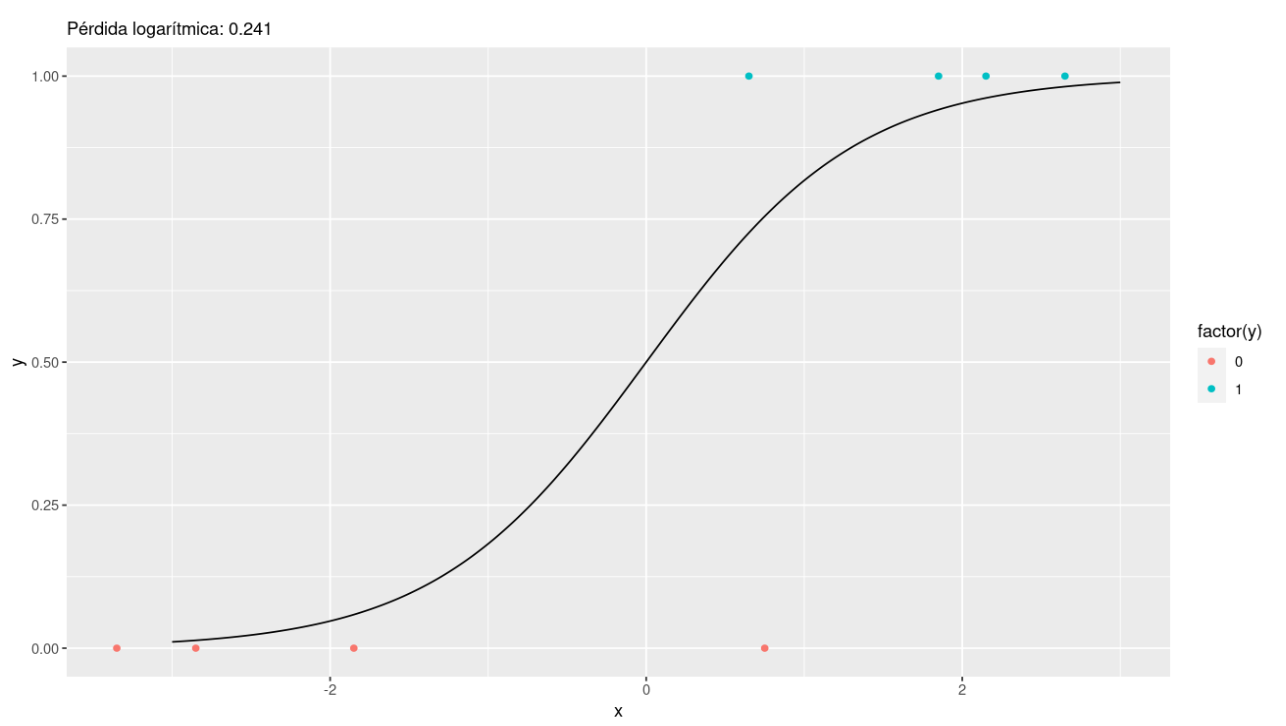

**Pregunta 2**:
<br>Usando el siguiente código o algo similar, encuentra los valores óptimos. ¿Qué optimizador se usa en este caso (consulta la documentación)? ¿Qué tan cercanos son a los valores que encontraste "manualmente" en la pregunta anterior? Si usaste otra función contesta con el optimizador que utiliza esa función.
```r
glm(y ~ x, datos_ent_tbl, family = "binomial")
```

Se utiliza un optimizador tipo [`binomial`](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/family) valores óptimos encontrados: $a=-2.043$ y $b=3.035$. Estos valores están muy alejados de los que yo encontré manualmente. 

Verifica que un optimizador genérico, para este problema, da la misma solución que la que vimos arriba, minimizando la pérdida lograrítmica.
<br>Valores resultantes: $a=-2.043$ y $b=3.035$.

```r
optim(par = c(0, 0), fn = perdida_log_ent)
```

## Regularización
Si queremos hacer regularización, entonces es necesario cambiar la función objetivo que queremos minimizar. Seleccionamos un valor de lambda y podemos minimizar.

**Pregunta 4**:
<br>¿Por qué en el ejemplo anterior obtienes una solución muy similar al de la pregunta anterior (mismos coeficientes)? Incrementa $\lambda$ y describe qué sucede con los coeficientes.
>Porque se está utilizando $\lambda=1x10^{-6}$, que como se vio en las notas anteriores, valores muy pequeños de penalización tienen un efecto nulo o casi nulo en el modelo.
><br>Al incrementar el valor de $\lambda$, el valor de $a$ va aumentando mientras que el valor de $b$ va disminuyendo

**Pregunta 5**:
<br>Explica por qué una solución regularizada podría desempeñarse mejor que el modelo que ajustamos sin regularización. Por ejemplo, explica por qué con pocos datos es riesgoso que algunas regiones tengan probabilidades muy cercanas a $0$ o $1$.